1. Load DataSet

Memuat dataset yang diperlukan

In [2]:
import pandas as pd
import numpy as np

In [3]:
data_jualan = pd.read_excel("data_penjualan-Copy.xlsx")
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak260,1000.0,1800.0,1800000.0
1,05/08/2022,FoodpakMatte245,1000.0,1900.0,1900000.0
2,05/08/2022,CraftLaminasi290,5000.0,750.0,3750000.0
3,05/08/2022,CraftLaminasi290,1000.0,1200.0,1200000.0
4,07/08/2022,Dupleks310,1000.0,1550.0,1550000.0
...,...,...,...,...,...
1071,14/11/2023,Ivory230,1000.0,900.0,900000.0
1072,15/11/2023,CraftLaminasi290,2000.0,800.0,1600000.0
1073,15/11/2023,CraftLaminasi290,1500.0,875.0,1312500.0
1074,15/11/2023,FoodpakMatte,1000.0,2200.0,2200000.0


Harus mengubah datetime menjadi formatnya (day - month - year)

Jenis product --> object --> astype(str

2.Data Cleaning


In [4]:
#cek apakah ada missing value
data_jualan.isna().sum()

Tanggal          0
Jenis Produk    20
Jumlah Order    45
Harga           52
Total           54
dtype: int64

Tanggal          0
Jenis Produk    20 -- modus()
Jumlah Order    45 --mean()
Harga           52 --mean--
Total           54 -- hasil kalo denan jumlah order*harga

fillna(value, inplace)

In [5]:
data_jualan["Jenis Produk"].fillna(data_jualan["Jenis Produk"].mode()[0], inplace=True)

C:\Users\TZ777\AppData\Local\Temp\ipykernel_4924\3211667542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["Jenis Produk"].fillna(data_jualan["Jenis Produk"].mode()[0], inplace=True)


In [6]:
data_jualan["Jumlah Order"].fillna(data_jualan["Jumlah Order"].mean(), inplace=True)

C:\Users\TZ777\AppData\Local\Temp\ipykernel_4924\1446405066.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["Jumlah Order"].fillna(data_jualan["Jumlah Order"].mean(), inplace=True)


In [7]:
data_jualan["Harga"].fillna(data_jualan["Harga"].mean(), inplace=True)

C:\Users\TZ777\AppData\Local\Temp\ipykernel_4924\908935075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["Harga"].fillna(data_jualan["Harga"].mean(), inplace=True)


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
#Metode pakai loc
data_jualan.loc[data_jualan["Total"].isna(), "Total"] = data_jualan["Jumlah Order"]*data_jualan["Harga"]
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak260,1000.0,1800.0,1800000.0
1,05/08/2022,FoodpakMatte245,1000.0,1900.0,1900000.0
2,05/08/2022,CraftLaminasi290,5000.0,750.0,3750000.0
3,05/08/2022,CraftLaminasi290,1000.0,1200.0,1200000.0
4,07/08/2022,Dupleks310,1000.0,1550.0,1550000.0
...,...,...,...,...,...
1071,14/11/2023,Ivory230,1000.0,900.0,900000.0
1072,15/11/2023,CraftLaminasi290,2000.0,800.0,1600000.0
1073,15/11/2023,CraftLaminasi290,1500.0,875.0,1312500.0
1074,15/11/2023,FoodpakMatte,1000.0,2200.0,2200000.0


In [10]:
#Metode gapakai loc
data_jualan["Total"] = data_jualan["Total"].fillna(data_jualan["Jumlah Order"] * data_jualan["Harga"])
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak260,1000.0,1800.0,1800000.0
1,05/08/2022,FoodpakMatte245,1000.0,1900.0,1900000.0
2,05/08/2022,CraftLaminasi290,5000.0,750.0,3750000.0
3,05/08/2022,CraftLaminasi290,1000.0,1200.0,1200000.0
4,07/08/2022,Dupleks310,1000.0,1550.0,1550000.0
...,...,...,...,...,...
1071,14/11/2023,Ivory230,1000.0,900.0,900000.0
1072,15/11/2023,CraftLaminasi290,2000.0,800.0,1600000.0
1073,15/11/2023,CraftLaminasi290,1500.0,875.0,1312500.0
1074,15/11/2023,FoodpakMatte,1000.0,2200.0,2200000.0


PreProcessing Data

In [11]:
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tanggal       1076 non-null   object 
 1   Jenis Produk  1076 non-null   object 
 2   Jumlah Order  1076 non-null   float64
 3   Harga         1076 non-null   float64
 4   Total         1076 non-null   float64
dtypes: float64(3), object(2)
memory usage: 42.2+ KB


In [12]:
#Mengubah object menjadi string object
data_jualan["Jenis Produk"] = data_jualan["Jenis Produk"].astype(str)

In [13]:
data_jualan["Tanggal"] = pd.to_datetime(data_jualan["Tanggal"], format="%d/%m/%Y")
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       1076 non-null   datetime64[ns]
 1   Jenis Produk  1076 non-null   object        
 2   Jumlah Order  1076 non-null   float64       
 3   Harga         1076 non-null   float64       
 4   Total         1076 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 42.2+ KB


In [14]:
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,2022-08-05,Foodpak260,1000.0,1800.0,1800000.0
1,2022-08-05,FoodpakMatte245,1000.0,1900.0,1900000.0
2,2022-08-05,CraftLaminasi290,5000.0,750.0,3750000.0
3,2022-08-05,CraftLaminasi290,1000.0,1200.0,1200000.0
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0
...,...,...,...,...,...
1071,2023-11-14,Ivory230,1000.0,900.0,900000.0
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0
1073,2023-11-15,CraftLaminasi290,1500.0,875.0,1312500.0
1074,2023-11-15,FoodpakMatte,1000.0,2200.0,2200000.0


4. Filterisasi data

In [15]:
data_jualan["Jenis Produk"].unique()

array(['Foodpak260', 'FoodpakMatte245', 'CraftLaminasi290', 'Dupleks310',
       'Ivory270', 'Kinstruk130', 'HVS', 'Dupleks350', 'CraftLaminasi',
       'GRESSPROFF', 'Ivory230+LaminasiDoff', '260Glossy',
       'CraftFoodpak290', 'Ivory230', 'Dupleks270', 'Kinstruk150',
       'FoodpakGlossy', 'Dupleks270Eplex', 'Ivory250', 'GreaseProof',
       'Foodpak295Matte', 'Foodpak260Glossy', 'Ivory300',
       'FoodpakGlossy260', 'Foodpak295', 'Dupleks400', 'FoodpakMatte295',
       'GreaseProof40', 'GreaseProofPlano', 'Dupleks270Laminating',
       'PTSariIndahPackagingIndustry', 'Craft310', 'Dupleks310P',
       'Craft290', 'Ivory250+Laminasi', 'StikerA3',
       'Ivory230+LaminasiAlas', 'CraftBiasa310', 'Ivory230+Laminating',
       'Ivory260Matte', 'Craft290Laminasi', 'Foodpak260Matte', 'Craft300',
       'DUPLEKS310', 'KertasSisaIvory300', 'CraftFoodpak290Laminasi',
       'Ivory350', 'FoodpakGlossy320', 'Craft270', 'PTSARIINDAH',
       'Dupleks350P', 'NCR', 'Craft275', 'Craft275Biasa',

Filterisasi Jenis Produk Dupleks270 di 2 Tahun (2022 dan 2023)

In [16]:
filter_data1 = data_jualan.copy()

In [17]:
#single logic
filter_data1 = filter_data1[filter_data1["Jenis Produk"]=="Dupleks270"]
filter_data1

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
30,2022-08-15,Dupleks270,1000.0,1900.000000,1900000.0
35,2022-08-18,Dupleks270,500.0,1713.202148,1100000.0
83,2022-09-14,Dupleks270,1000.0,1800.000000,1800000.0
203,2022-11-22,Dupleks270,1000.0,1800.000000,1800000.0
252,2022-12-07,Dupleks270,1000.0,1500.000000,1500000.0
271,2022-12-14,Dupleks270,1000.0,2000.000000,2000000.0
344,2023-01-06,Dupleks270,1000.0,1500.000000,1500000.0
451,2023-03-06,Dupleks270,2500.0,1700.000000,4250000.0
505,2023-04-04,Dupleks270,1000.0,1600.000000,1600000.0
564,2023-05-04,Dupleks270,1000.0,1400.000000,1400000.0


In [18]:
#cara menambahkan kolom bulan dan tahun
filter_data1["Bulan"] = filter_data1["Tanggal"].dt.month_name()
filter_data1

filter_data1["Tahun"] = filter_data1["Tanggal"].dt.year
filter_data1

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
30,2022-08-15,Dupleks270,1000.0,1900.000000,1900000.0,August,2022
35,2022-08-18,Dupleks270,500.0,1713.202148,1100000.0,August,2022
83,2022-09-14,Dupleks270,1000.0,1800.000000,1800000.0,September,2022
203,2022-11-22,Dupleks270,1000.0,1800.000000,1800000.0,November,2022
252,2022-12-07,Dupleks270,1000.0,1500.000000,1500000.0,December,2022
271,2022-12-14,Dupleks270,1000.0,2000.000000,2000000.0,December,2022
344,2023-01-06,Dupleks270,1000.0,1500.000000,1500000.0,January,2023
451,2023-03-06,Dupleks270,2500.0,1700.000000,4250000.0,March,2023
505,2023-04-04,Dupleks270,1000.0,1600.000000,1600000.0,April,2023
564,2023-05-04,Dupleks270,1000.0,1400.000000,1400000.0,May,2023


In [19]:
penghasilan2_periode_data1 = filter_data1.groupby("Bulan").agg(
    total_order = ("Jumlah Order", "sum"),
    total_pendapatan = ("Total", "sum")
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [20]:
penghasilan2_periode_data1

,total_order,total_pendapatan
Bulan,,
January,1000.0,1500000.0
February,NaN,NaN
March,2500.0,4250000.0
April,1000.0,1600000.0
May,2500.0,4200000.0
June,NaN,NaN
July,6000.0,9600000.0
August,12500.0,21600000.0
September,6000.0,8800000.0


In [21]:
filter_data2 = data_jualan.copy()
filter_data2

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,2022-08-05,Foodpak260,1000.0,1800.0,1800000.0
1,2022-08-05,FoodpakMatte245,1000.0,1900.0,1900000.0
2,2022-08-05,CraftLaminasi290,5000.0,750.0,3750000.0
3,2022-08-05,CraftLaminasi290,1000.0,1200.0,1200000.0
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0
...,...,...,...,...,...
1071,2023-11-14,Ivory230,1000.0,900.0,900000.0
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0
1073,2023-11-15,CraftLaminasi290,1500.0,875.0,1312500.0
1074,2023-11-15,FoodpakMatte,1000.0,2200.0,2200000.0


In [22]:
filter_data2 = filter_data2[(filter_data2["Jenis Produk"]=="Dupleks270") & (filter_data2["Total"]>3000000)]
filter_data2

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
451,2023-03-06,Dupleks270,2500.0,1700.0,4250000.0
718,2023-07-10,Dupleks270,3000.0,1800.0,5400000.0
719,2023-07-11,Dupleks270,3000.0,1400.0,4200000.0
799,2023-08-07,Dupleks270,4000.0,1800.0,7200000.0
800,2023-08-07,Dupleks270,4000.0,1400.0,5600000.0
928,2023-09-20,Dupleks270,5000.0,1400.0,7000000.0
1041,2023-11-06,Dupleks270,4000.0,1400.0,5600000.0


--- Q U I Z ---

In [23]:
filter_data3 = data_jualan.copy()

In [24]:
filter_data3 = filter_data3[filter_data3["Jenis Produk"]=="DUPLEKS310"]
filter_data3["Bulan"] = filter_data3["Tanggal"].dt.month_name()
filter_data3["Tahun"] = filter_data3["Tanggal"].dt.year
filter_data3

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
269,2022-12-13,DUPLEKS310,1000.0,1713.202148,1200000.0,December,2022
491,2023-03-25,DUPLEKS310,1000.0,1300.000000,1300000.0,March,2023


In [25]:
filter_data3 = filter_data3[(filter_data3["Jenis Produk"]=="DUPLEKS310") & (filter_data3["Total"]>100000)]
filter_data3

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
269,2022-12-13,DUPLEKS310,1000.0,1713.202148,1200000.0,December,2022
491,2023-03-25,DUPLEKS310,1000.0,1300.000000,1300000.0,March,2023


In [26]:
filter_data4 = data_jualan.copy()

In [27]:
filter_data4 = filter_data4[filter_data4["Jenis Produk"]=="HVS"]
filter_data4["Bulan"] = filter_data4["Tanggal"].dt.month_name()
filter_data4["Tahun"] = filter_data4["Tanggal"].dt.year
filter_data4

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
8,2022-08-09,HVS,1500.0,1713.202148,1275000.0,August,2022
62,2022-09-03,HVS,20000.0,250.000000,5000000.0,September,2022
128,2022-10-07,HVS,20000.0,250.000000,5000000.0,October,2022
197,2022-11-20,HVS,20000.0,250.000000,5000000.0,November,2022
256,2022-12-07,HVS,20000.0,250.000000,5000000.0,December,2022
345,2023-01-06,HVS,20000.0,250.000000,5000000.0,January,2023
431,2023-02-21,HVS,40000.0,250.000000,10000000.0,February,2023
547,2023-04-29,HVS,20000.0,250.000000,5000000.0,April,2023
570,2023-05-05,HVS,2000.0,250.000000,500000.0,May,2023
684,2023-06-26,HVS,20000.0,250.000000,5000000.0,June,2023


In [28]:
filter_data4 = data_jualan.copy()

In [29]:
filter_data4 = filter_data4[(filter_data4["Jenis Produk"]=="HVS") & (filter_data4["Jumlah Order"]>1000)]
filter_data4

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
8,2022-08-09,HVS,1500.0,1713.202148,1275000.0
62,2022-09-03,HVS,20000.0,250.000000,5000000.0
128,2022-10-07,HVS,20000.0,250.000000,5000000.0
197,2022-11-20,HVS,20000.0,250.000000,5000000.0
256,2022-12-07,HVS,20000.0,250.000000,5000000.0
345,2023-01-06,HVS,20000.0,250.000000,5000000.0
431,2023-02-21,HVS,40000.0,250.000000,10000000.0
547,2023-04-29,HVS,20000.0,250.000000,5000000.0
570,2023-05-05,HVS,2000.0,250.000000,500000.0
684,2023-06-26,HVS,20000.0,250.000000,5000000.0


4. Visualisasi

In [30]:
import matplotlib.pyplot as plt

In [31]:
#filterisasi data 
penghasilan2_periode_data3 = filter_data3.groupby("Bulan").agg(
    jumlah_order = ("Jumlah Order", "sum"),
    total_pendapatan = ("Total", "sum"),
                       ).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [32]:
penghasilan2_periode_data3

,jumlah_order,total_pendapatan
Bulan,,
January,NaN,NaN
February,NaN,NaN
March,1000.0,1300000.0
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,NaN,NaN


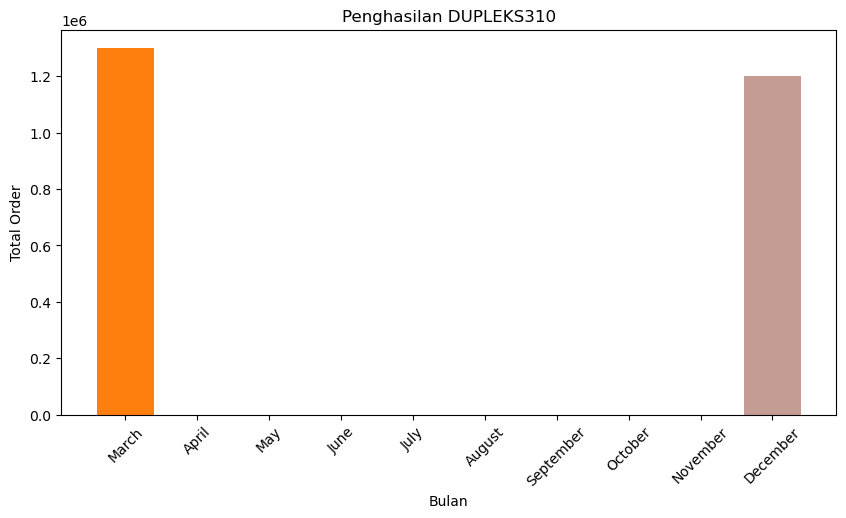

In [33]:
#visualisasi
plt.figure(figsize=(10,5))

colors = plt.cm.tab20.colors

plt.bar(penghasilan2_periode_data3.index,
        penghasilan2_periode_data3["total_pendapatan"],
        label = penghasilan2_periode_data3.index,
        color = colors[:len(penghasilan2_periode_data3)])

plt.xlabel("Bulan")
plt.ylabel("Total Order")
plt.title("Penghasilan DUPLEKS310")
plt.xticks(rotation=45)


plt.show()

In [43]:
#filter data single logic
penghasilan4_periode_data = filter_data4.groupby("Bulan").agg(
    jumlah_order = ("Jumlah Order", "sum"),
    total_pendapatan = ("Total", "sum"),
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

KeyError: 'Bulan'

In [ ]:
penghasilan4_periode_data

In [ ]:
#visualisasi data
plt.figure(figsize=(10,5))

colors = plt.cm.tab20.colors

plt.bar(penghasilan4_periode_data.index,
        penghasilan4_periode_data["total_pendapatan"],
        label = penghasilan4_periode_data.index,
        color = colors[:len(penghasilan4_periode_data)])

plt.xlabel("Bulan")
plt.ylabel("Total Pendapatan")
plt.title("Penghasilan HVS")
plt.xticks(rotation=45)

plt.show()